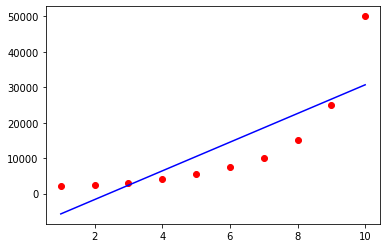



lineear regresyon r2 score value
0.6690412331929894
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


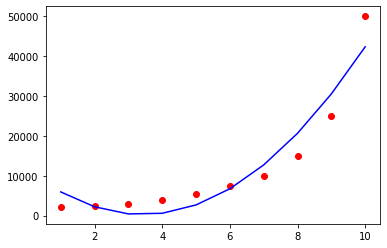

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


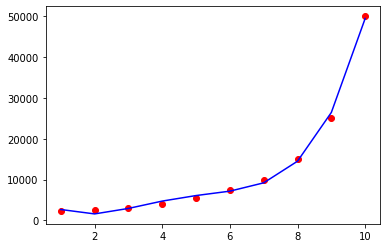

[[34716.66666667]]
[[16923.33333333]]
[[8146.9948718]]
[[89041.66666669]]


polinom regresyon r2 score value
0.9162082221443943


In [59]:
#1.kutuphaneler eklenir
from cgi import test
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#veri yukleme
veriler = pd.read_csv("maaslar.csv")
#print(veriler)

#data frame dilimleme(slice)
x = veriler.iloc[:,1:2] #tum satırlar ve 0'dan 2'e kadar 2 haric- hepsini al
y = veriler.iloc[:, 2:]
#dataframe nedeni ile grafik sorunu yasamamak icin degerlerini al
#dizi, numpy array donusumu
X = x.values
Y = y.values

#print(x)
#print(y)



#polynomial regression
#dogrusal model olusturma
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
plt.scatter(X,Y,color="red")
plt.plot(x,lin_reg.predict(X),color="blue")
plt.show()

print('\n')
print('lineear regresyon r2 score value')
print(r2_score(Y,lin_reg.predict(X)))
print('\n')

#polynomial regreassion
#dogrusal olmayan nonlinear model olusturma
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) #ikinci dereceden olustur
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y) #x'e gore y'yi egit
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color="blue")
plt.show()

poly_reg2 = PolynomialFeatures(degree=4) #ikinci dereceden olustur
x_poly = poly_reg2.fit_transform(X)
print(x_poly)

lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly,y) #x'e gore y'yi egit
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg3.predict(poly_reg2.fit_transform(X)),color="blue")
plt.show()

#Tahmin
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))
#tahmine varmadan donusum yap
print(lin_reg3.predict(poly_reg2.fit_transform([[6.6]])))
print(lin_reg3.predict(poly_reg2.fit_transform([[11]])))

print('\n')
print('polinom regresyon r2 score value')
print(r2_score(Y,lin_reg2.predict(poly_reg.fit_transform(X))))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
X_olcekli = sc1.fit_transform(X)
sc2=StandardScaler()
Y_olcekli = sc2.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


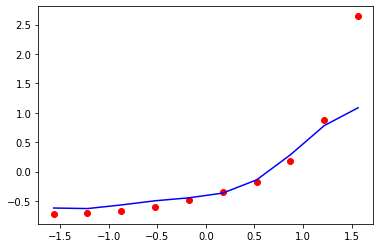

[0.01150915]
[0.01150915]
svr forest r2 score value
0.7513836788854973


In [56]:
from sklearn.svm import SVR
SVR_reg = SVR(kernel = 'rbf')
SVR_reg.fit(X_olcekli,Y_olcekli)
plt.scatter(X_olcekli,Y_olcekli,color="red")
plt.plot(X_olcekli,SVR_reg.predict(X_olcekli),color="blue")
plt.show()
print(SVR_reg.predict([[11]]))
print(SVR_reg.predict([[6.6]]))

print('svr r2 score value')
print(r2_score(Y_olcekli,SVR_reg.predict(X_olcekli)))

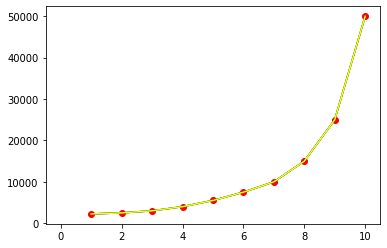

[50000.]
[10000.]
Random forest r2 score value
1.0


In [54]:
from sklearn.tree import DecisionTreeRegressor
r_dt  = DecisionTreeRegressor(random_state = 0)
r_dt.fit(X,Y)
Z = X + 0.5
K = X - 0.4
plt.scatter(X,Y,color="red")
plt.plot(X,r_dt.predict(X), color="blue")
plt.plot(x,r_dt.predict(Z), color = "green")
plt.plot(x,r_dt.predict(K), color="yellow")
plt.plot(r_dt.predict([[11]]))
plt.plot(r_dt.predict([[6.6]]))
plt.show()

print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

print('decision forest r2 score value')
print(r2_score(Y,r_dt.predict(X)))

[10500.]


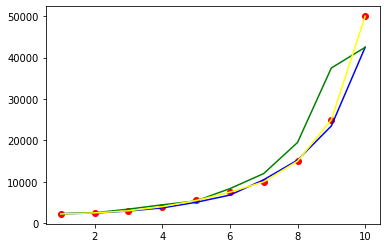

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10,random_state=0) #n_estimators ne kadar estimator kullanılacak 10 farklı decision tree
rf_reg.fit(X,Y.ravel())
print(rf_reg.predict([[6.6]]))

plt.scatter(X,Y,color="red")
plt.plot(X,rf_reg.predict(X),color="blue")

plt.plot(X,rf_reg.predict(Z),color="green")
plt.plot(x,r_dt.predict(K),color="yellow")

In [53]:
from sklearn.metrics import r2_score
print('Random forest r2 score value')
print(r2_score(Y,rf_reg.predict(X)))

Random forest r2 score value
0.9704434230386582


In [61]:
#Özet r2 değerleri
print('lineear regresyon r2 score value')
print(r2_score(Y,lin_reg.predict(X)))
print('\n')
print('polinom regresyon r2 score value')
print(r2_score(Y,lin_reg2.predict(poly_reg.fit_transform(X))))
print('\n')
print('svr r2 score value')
print(r2_score(Y_olcekli,SVR_reg.predict(X_olcekli)))
print('\n')
print('decision forest r2 score value')
print(r2_score(Y,r_dt.predict(X)))
print('\n')
print('Random forest r2 score value')
print(r2_score(Y,rf_reg.predict(X)))

lineear regresyon r2 score value
0.6690412331929894


polinom regresyon r2 score value
0.9162082221443943


svr r2 score value
0.7513836788854973


decision forest r2 score value
1.0


Random forest r2 score value
0.9704434230386582
